In [126]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

In [127]:
# load in data from gorilla
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "gorilla_v3.csv"))

## Clean up data and concatenate

In [128]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version', 'Participant Private ID',
           'counterbalance-mpke', 'Spreadsheet Row', 'Zone Type', 
           'Reaction Time', 'Response', 'display', 'iti_dur_ms', 
           'trial_dur_ms', 'V1', 'V2', 'V2', 'V3', 'V4', 'V5',
          'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'})

In [129]:
# clean spreadsheet
df_filtered = df_filtered.rename({'Zone Type':'Zone_Type'}, axis=1)
df_filtered = df_filtered.rename({'Participant Private ID':'Participant_Private_ID'}, axis=1)
df_filtered.columns

Index(['Experiment Version', 'V9', 'V7', 'Spreadsheet Row', 'V11', 'Response',
       'Experiment ID', 'V4', 'V8', 'display', 'V6', 'V10', 'V1', 'V2', 'V5',
       'trial_dur_ms', 'Participant_Private_ID', 'Reaction Time', 'iti_dur_ms',
       'counterbalance-mpke', 'Zone_Type', 'V3', 'V12', 'Task Version'],
      dtype='object')

In [130]:
# select response-only rows and re-index
df_filtered = df_filtered.query('Zone_Type=="response_rating_scale_likert"')
df_filtered = df_filtered.reset_index()
del df_filtered['index']

## Investigate and remove outliers

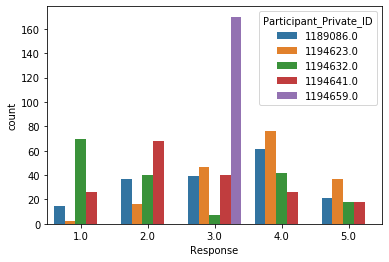

In [131]:
#Investigate Outliers 

def distribution_of_participants_per_version(x):
    "Gives distribution of scores for each participant of a particular version (where x='version', i.e. V1, V2, etc)"
    df_filtered_x = df_filtered.loc[df_filtered['counterbalance-mpke'] == x]
    df_filtered_x.Participant_Private_ID.unique()
    return sns.countplot(x='Response', hue='Participant_Private_ID', data= df_filtered_x)
    
distribution_of_participants_per_version("V12")

In [132]:
# Drop Outlier in V2, V5??

In [148]:
# Drop Outlier in V8
df_where_outlier_1 = df_filtered[df_filtered.Participant_Private_ID == 1189080.0]
print(df_where_outlier_1.index)
df_refiltered = df_filtered.drop(df_filtered.index[0:178])
df_refiltered.count

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64', length=178)


<bound method DataFrame.count of        Experiment Version                                                 V9  \
178                  10.0  Some of the kids thought the professor wasn't ...   
179                  10.0  Derek planned to lift weights every day to get...   
180                  10.0       Albert lived in a thatched hut that he built   
181                  10.0          After seeing the bill, Ruth forgot to pay   
182                  10.0      After canoeing all day, May's arms were tired   
...                   ...                                                ...   
10319                10.0       Timmy wore the bandana so long he got a rash   
10320                10.0  The woman walked with three little children in...   
10321                10.0          The bigger ship had a smaller boat in tow   
10322                10.0  The frantic stranded driver called to request ...   
10323                10.0  Before college, the student was afraid that he...   

      

In [149]:
# Drop Outlier in V12
df_where_outlier_2 = df_refiltered[df_refiltered.Participant_Private_ID == 1194659.0]
print(df_where_outlier_2.index)
df_final_filtered = df_refiltered.drop(df_filtered.index[9434:9612])
df_final_filtered.count

Int64Index([9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443,
            ...
            9602, 9603, 9604, 9605, 9606, 9607, 9608, 9609, 9610, 9611],
           dtype='int64', length=178)


<bound method DataFrame.count of        Experiment Version                                                 V9  \
178                  10.0  Some of the kids thought the professor wasn't ...   
179                  10.0  Derek planned to lift weights every day to get...   
180                  10.0       Albert lived in a thatched hut that he built   
181                  10.0          After seeing the bill, Ruth forgot to pay   
182                  10.0      After canoeing all day, May's arms were tired   
...                   ...                                                ...   
10319                10.0       Timmy wore the bandana so long he got a rash   
10320                10.0  The woman walked with three little children in...   
10321                10.0          The bigger ship had a smaller boat in tow   
10322                10.0  The frantic stranded driver called to request ...   
10323                10.0  Before college, the student was afraid that he...   

      

In [151]:
# Re-Index 
df_final_filtered = df_final_filtered.reset_index()
del df_final_filtered['index']
df_final_filtered

,Experiment Version,V9,V7,Spreadsheet Row,V11,Response,Experiment ID,V4,V8,display,...,V5,trial_dur_ms,Participant_Private_ID,Reaction Time,iti_dur_ms,counterbalance-mpke,Zone_Type,V3,V12,Task Version
0,10.0,Some of the kids thought the professor wasn't ...,The farmer used the extra corn he had as feed,2.0,Abby stuck his picture to her wall with a tack,1.0,13726.0,The landscaper went to the branch and started ...,Little Gracie said the most boring place ever ...,trial,...,His brand new soccer ball had landed in the mud,10000.0,1189081.0,9993.326,500.0,V6,response_rating_scale_likert,"Every morning, Liz would carefully brush her hair","At noon, the grandfather clock began to loudly...",19.0
1,10.0,Derek planned to lift weights every day to get...,The worried mother had many mouths to feed,3.0,Frankie had four plants getting sunned on the ...,2.0,13726.0,Tom carefully searched for a bolt of the right...,He was a sweet boy until he entered that school,trial,...,The hiker's new boots were stuck in the deep mud,10000.0,1189081.0,9993.388,500.0,V6,response_rating_scale_likert,The young girl told her mom she wanted longer ...,In the morning all the baby birds start to chirp,19.0
2,10.0,Albert lived in a thatched hut that he built,Andrea watered her garden with a small hose,4.0,"After the rain stopped, Caroline played outsid...",4.0,13726.0,I returned the dress because it was the wrong ...,The sugar content in Ivy's cake was too high,trial,...,"Distracted while driving, Maya got stuck in th...",10000.0,1189081.0,9993.350,500.0,V6,response_rating_scale_likert,The sloppy boy was too lazy to cut his hair,"In the morning, Kathy hoped that the birds wou...",19.0
3,10.0,"After seeing the bill, Ruth forgot to pay",Fred only criticized Larry to make him feel bad,5.0,The minor damage to their car was from hail,3.0,13726.0,The football practice was canceled due to extr...,The newborn chickens spent the day following t...,trial,...,The farm worker collected fresh eggs from the ...,10000.0,1189081.0,9993.310,500.0,V6,response_rating_scale_likert,"Tucker has no filter, and says whatever enters...",In the summer she loved hearing the crickets c...,19.0
4,10.0,"After canoeing all day, May's arms were tired",The healthorganic,6.0,His mother cautioned him about letting the ban...,2.0,13726.0,"When Simon tore his pants, there was a loud rip",The farm animals were transported in a truck,trial,...,The mother went to the preschool to pick up he...,10000.0,1189081.0,9993.305,500.0,V6,response_rating_scale_likert,Greg's dentist was very impressed by his teeth,Sarah threw the dirty towel in the hamper,19.0
5,10.0,She had worked out that day and was very tired,Growing up with three brothers made Maddy tough,7.0,Terry told Jay the old fruit had begun to rot,1.0,13726.0,The dog ran inside just before it started to rain,The scared girl ran upstairs to her bedroom an...,trial,...,"Though gruff to his friends, Hank wasn't to hi...",10000.0,1189081.0,9993.292,500.0,V6,response_rating_scale_likert,The neighbor's dog was scary because of its teeth,"In woodshop, Alex smoothed the baseball bat wi...",19.0
6,10.0,The dog napped on the carpet because it was tired,She grew up with five brothers so she's pretty...,8.0,The green fuzz indicated the food had started ...,1.0,13726.0,The couple's trip was ruined when it began to ...,"During the thunderstorm, the dog entered the c...",trial,...,Her father said the most important people are ...,10000.0,1189081.0,9993.221,500.0,V6,response_rating_scale_likert,The tiger had punctured the ball with its teeth,Jamie preferred to use cooking foil made of al...,19.0
7,10.0,Mary missed Ellen's birthday party because she...,Hadley felt her grandfather's passing left a g...,9.0,The sandwich left under Henry's bed started to...,2.0,13726.0,The weatherman announced that the day would ha...,When Jim heard his mom calling he ran and hid,trial,...,"The farmer, while organizing, had to move a tr...",10000.0,1189081.0,9993.261,500.0,V6,response_r

## Visualizations

## Distribution of versions

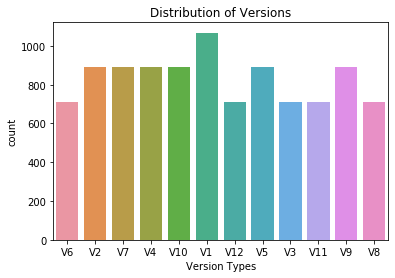

In [153]:
sns.countplot(x='counterbalance-mpke', data=df_final_filtered)
plt.xlabel('Version Types')
plt.title('Distribution of Versions');
# Therefore, V3, V6, V8, V11, and V12 (n=4); V2, V4, V5, V7, V9, & V10 (n=5) ;V1 (n=6)

## Distribution of CoRT scores

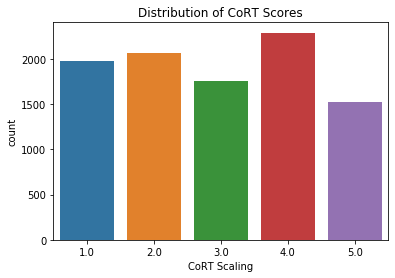

In [154]:
sns.countplot(x='Response', data=df_final_filtered)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores');

## Distrubution of CoRT scores broken down by version

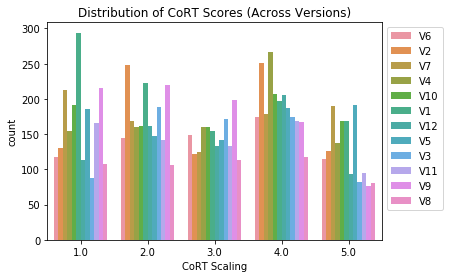

In [155]:
ax = sns.countplot(x='Response', hue='counterbalance-mpke', data=df_final_filtered)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores (Across Versions)');

## Calculate SDs for each item

## Incorporate cloze probabilities

## Select for final sentences